GUI

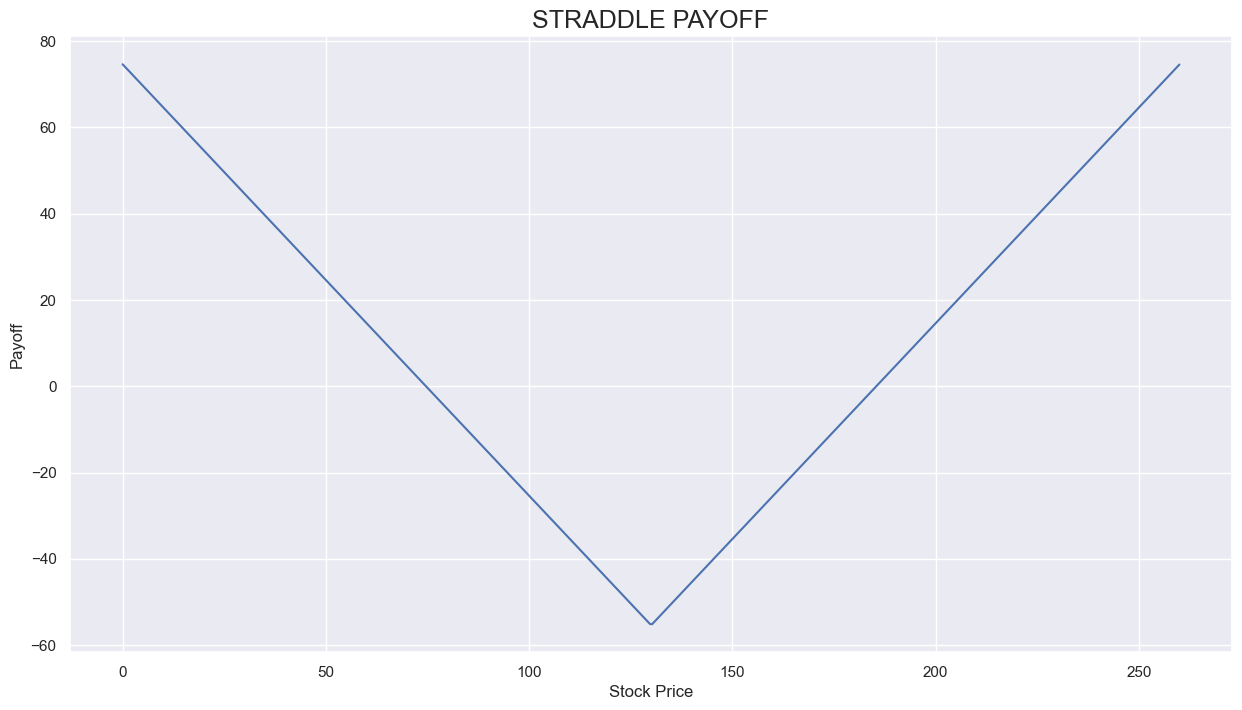

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from classes import *
sns.set(rc={'figure.figsize':(15,8)})
import tkinter as tk
from tkinter import ttk
import sys

data = pd.read_csv('Stock_data.csv')
risk_free = pd.read_csv('Rf.csv').rf.mean()


class OutputWindow(tk.Toplevel):
    def __init__(self, parent):
        super().__init__(parent)
        self.title("Output")
            
        self.output_text = tk.Text(self, height=20, width=60)
        self.output_text.pack()

        # Make the output window read-only
        self.output_text.config(state="disabled")

        sys.stdout = self
        
    def write(self, message):
        self.output_text.config(state="normal")
        self.output_text.insert(tk.END, message)
        self.output_text.config(state="disabled")
        
    def flush(self):
        pass

def open_option_type_window():
    derivative = derivative_var.get()
    stock_ticker = stock_var.get()
    maturity = float(maturity_entry.get())

    if derivative != "Forward":
        option_type_window = tk.Toplevel(window)
        option_type_window.title("Option Type Selection")

        stock_price_frame = ttk.LabelFrame(option_type_window, text="Current Stock price")
        stock_price_frame.pack(padx=10, pady=10)
        stock_price = round(Stock(stock_ticker, data).S0, 5)
        stock_price_label = ttk.Label(stock_price_frame, text=stock_ticker.upper()+": "+str(stock_price))
        stock_price_label.pack()
        
        option_type_label = ttk.Label(option_type_window, text="Select Option Type:")
        option_type_label.pack()
        option_type_var = tk.StringVar()
        option_type_dropdown = ttk.Combobox(option_type_window, textvariable=option_type_var)
        option_type_dropdown['values'] = ['European','American','Asian']
        option_type_dropdown.pack()
        

        parameter_frame = ttk.LabelFrame(option_type_window, text="Parameter Input")
        parameter_frame.pack(padx=10, pady=10)

    
        if derivative in ['Call', 'Put','Straddle', 'Chooser']:
            parameter_label = ttk.Label(parameter_frame, text="Strike Price:")
            parameter_label.pack()
            parameter_entry = ttk.Entry(parameter_frame)
            parameter_entry.pack()

        elif derivative in ['Bear Spread', 'Bull Spread']:
            parameter1_label = ttk.Label(parameter_frame, text="Parameter 1:")
            parameter1_label.pack()
            parameter1_entry = ttk.Entry(parameter_frame)
            parameter1_entry.pack()

            parameter2_label = ttk.Label(parameter_frame, text="Parameter 2:")
            parameter2_label.pack()
            parameter2_entry = ttk.Entry(parameter_frame)
            parameter2_entry.pack()

        elif derivative == 'Butterfly Spread':
            parameter1_label = ttk.Label(parameter_frame, text="Parameter 1:")
            parameter1_label.pack()
            parameter1_entry = ttk.Entry(parameter_frame)
            parameter1_entry.pack()

            parameter2_label = ttk.Label(parameter_frame, text="Parameter 2:")
            parameter2_label.pack()
            parameter2_entry = ttk.Entry(parameter_frame)
            parameter2_entry.pack()

            parameter3_label = ttk.Label(parameter_frame, text="Parameter 3:")
            parameter3_label.pack()
            parameter3_entry = ttk.Entry(parameter_frame)
            parameter3_entry.pack()

        def compute():
            option_type = option_type_var.get()
            compute_price(derivative, option_type, stock_ticker, maturity, stock_price, float(parameter_entry.get()) if derivative in ['Call', 'Put', 'Straddle', 'Chooser'] else float(parameter1_entry.get()), float(parameter2_entry.get()) if derivative in ['Bear Spread','Bull Spread','Butterfly Spread'] else None, float(parameter3_entry.get()) if derivative == 'Butterfly Spread' else None)

        compute_button = ttk.Button(option_type_window, text="Compute", command=compute)
        compute_button.pack()
    else:
        parameter_window = tk.Toplevel(window)

        stock_price_frame = ttk.LabelFrame(parameter_window, text="Current Stock price")
        stock_price_frame.pack(padx=10, pady=10)
        stock_price = round(Stock(stock_ticker, data).S0, 5)
        stock_price_label = ttk.Label(stock_price_frame, text=stock_ticker.upper()+": "+str(stock_price))
        stock_price_label.pack()
        parameter_window.title("Parameter selection")
        parameter_frame = ttk.LabelFrame(parameter_window, text="Parameter Input")
        parameter_frame.pack(padx=10, pady=10)

    

        parameter_label = ttk.Label(parameter_frame, text="Strike Price:")
        parameter_label.pack()
        parameter_entry = ttk.Entry(parameter_frame)
        parameter_entry.pack()

        def compute():
            compute_price(derivative, "European", stock_ticker, maturity, stock_price, float(parameter_entry.get()))

        compute_button = ttk.Button(parameter_window, text="Compute", command=compute)
        compute_button.pack()

def compute_price(derivative, option_type, stock_ticker, maturity, stock_price, parameter=None, parameter2=None, parameter3=None):
    my_option = create_option(derivative, option_type, Stock(stock_ticker, data), risk_free, maturity, parameter=parameter, parameter2=parameter2, parameter3=parameter3)
    my_option.graph()
    output_window = OutputWindow(window)
    output_window.write("Derivative price: " + str(np.round(my_option.price, 6)) + "\n")
    output_window.write("Derivative: " + derivative + "\n")
    output_window.write("Stock ticker: " + stock_ticker.upper() + "\n")
    output_window.write("Initial price: " + str(np.round(stock_price, 6)) + "\n")
    output_window.write("Option Type: " + option_type + "\n")
    if parameter:
        output_window.write("Parameter 1: " + str(parameter) + "\n")
    if parameter2:
        output_window.write("Parameter 2: " + str(parameter2) + "\n")
    if parameter3:
        output_window.write("Parameter 3: " + str(parameter3) + "\n")
    output_window.write("\n")


# Main window
window = tk.Tk()
window.title("Derivative Pricing")

# Derivative Selection
derivative_frame = ttk.LabelFrame(window, text="Select Derivative")
derivative_frame.pack(padx=10, pady=10)

derivative_label = ttk.Label(derivative_frame, text="Derivative:")
derivative_label.pack()
derivative_var = tk.StringVar()
derivative_dropdown = ttk.Combobox(derivative_frame, textvariable=derivative_var)
derivative_dropdown['values'] = ['Call', 'Put', 'Forward', 'Bear Spread', 'Bull Spread', 'Straddle', 'Butterfly Spread', 'Chooser']
derivative_dropdown.pack()

# Stock ticker input
stock_frame = ttk.LabelFrame(window, text="Select Stock from S&P500")
stock_frame.pack(padx=10, pady=10)

stock_label = ttk.Label(stock_frame, text="Stock:")
stock_label.pack()
stock_var = tk.StringVar()
stock_dropdown = ttk.Combobox(stock_frame, textvariable=stock_var)
stock_dropdown['values'] = data[data['date'] == data.date.max()]['ticker'].drop_duplicates().sort_values().tolist()
stock_dropdown.pack()

# Maturity input
maturity_label = ttk.Label(window, text="Maturity (in months):")
maturity_label.pack()
maturity_entry = ttk.Entry(window)
maturity_entry.pack()

option_type_button = ttk.Button(window, text="Next", command=open_option_type_window)
option_type_button.pack()

# Run the main event loop
window.mainloop()